#### Setup
In order for all of the code below to work we need to do some necessary Python incantations.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches # we'll use the wedge patch for drawing apertures
import plotutils as pu # helpers to setup matplotlib
import pfcalc # helpers for this notebook to hide all my fugly plotting code
%matplotlib inline

This notebook describes the alternative pupil fill calculation in the ITFW (integration time framework, also known as the dose framework) that will be used to support the new moon apertures.

#### Overview
When we observe light that is reflected from _tall_ open structures we tend to observe multiple _layers_ in the objective that are layed out like concentric circles in a 2D plane.

Since we are only interested in the first order we want to cut away the other circles and these apertures are designed to do that. 

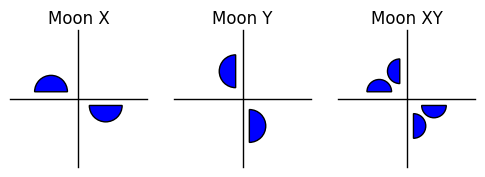

In [2]:
pfcalc.aperture_examples()

When light goes through an aperture it will eventually hit the _reflective_, reflect in the opposite angle (more or less) and continue its path until it finally hits the *objective*. The light will naturally hit the objective in a (sort of) reflected position depending on the direction of the beam. In our case, the exact position also depends on the wavelength and the alignment and pitch of the grating. 

We will assume that the alignment of the grating and the type of aperture chosen are such that the light that we are interested in ends up in the top right quadrant. This means that our objective position only depends on the wavelength $\lambda$ and pitch of the grating $p$ which we will define soon.

We can visualize our main use cases as follows where the blue part represents the position where the light enters the aperture and the red part represents the position where the light hits the objective under ideal circumstances.

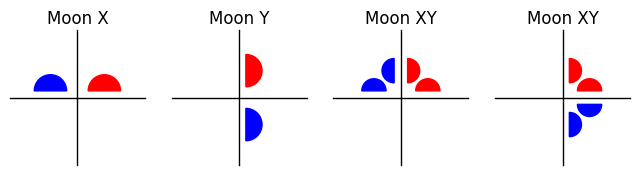

In [3]:
pfcalc.aperture_reflection_examples()

Notice again that in all of these cases we are interested in the light that ends up in the top right quadrant. The real goal of this calculation is to calculate the red zone with regards to the pitch of the grating, the wavelength of the light and the numerical aperture of the obvjective.

This calculation is based on _pixel counting_ and so we need to translate from NA coordinates to pixel coordinates. In NA coordinate space the origin $(0,0)$ is in the center of the plane. But in pixel coordinate space the origin is at the lower left corner (or the top left corner in some graphics systems) of the bitmap. That means that the point $(0,0)$ in NA coordinates is equivalent to the center point $cp = (\lceil\frac{W}{2}\rceil, \lceil\frac{H}{2}\rceil)$ in pixel or bitmap coordinates where $W$ and $H$ are the width and height of our bitmap respectively.

Since our bitmaps are square with fixed size we can get away with using scalars instead of vectors to translate both $x$ and $y$ coordinates from one coordinate system to another. Also we can make them constant since these will not change during runtime.

In [4]:
W = 550  # width (and height) of our bitmap
cp = 275 # center point of our bitmap